In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
import matplotlib.pyplot as plt

In [2]:
folder = '06_20_18_5k_10k_PEG_agarose'
bucket = 'dtoghani.data'
experiment = '100nm_5k_PEG'

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02
bins = {}

for num in range(1, vids+1):
    to_track.append('100nm_5k_PEG_XY{}'.format('%02d' % num))
for num in range(0, wells):
    slices = int(vids/wells)
    s1 = num*slices
    s2 = (num+1)*(slices)
    pref = '100nm_5k_PEG_W{}'.format(num)
    bins[pref] = to_track[s1:s2]

In [ ]:
# for prefix in to_track:
#     aws.download_s3('{}/msd_{}.csv'.format(folder, prefix), 'msd_{}.csv'.format(prefix), bucket_name=bucket)
#     msd.gavg_MSDs(prefix, remote_folder=folder, bucket=bucket)

In [3]:
geoM2xy = {}
gSEM = {}
SM2xy = {}
npar = {}

In [4]:
#Load geometrically averaged datasets and prep for averaging.

for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))

In [ ]:
test = {}
for key in geoM2xy:
    test[key] = geoM2xy[key] - gSEM[key]

test

In [ ]:
# geo_slices = {}
# gSEM_slices = {}
# w_slices = {}
# wo_slices = {}

# for channel in channels:
#     for surface_functionality in surface_functionalities:
#         slice_counter = 0
#         for slic in slices:
#             video_counter = 0
#             w_holder = np.zeros((nvids, frames))
#             sample_name = "{}_{}_{}_{}".format(channel, surface_functionality, cond, slic)
#             for key in geoM2xy:
#                 if sample_name in key:
#                     w_holder[video_counter, :] = 1/(gSEM[key]*gSEM[key])
#                     video_counter = video_counter + 1
#             wo_slices[sample_name] = np.sum(w_holder, axis=0)
#             slice_counter = slice_counter + 1

# Average over videos in each well

In [5]:
#Average over videos in each well.

geo_slices = {}
gSEM_slices = {}
w_slices = {}
wo_slices = {}

for key in bins:
    video_counter = 0
    w_holder = np.zeros((slices, frames))
    for sample in bins[key]:
        #print(sample)
        w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
        video_counter = video_counter + 1
    wo_slices[key] = np.sum(w_holder, axis=0)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


In [6]:
for key in bins:
    print(np.mean(wo_slices[key][1:50]))

128943.192474
203716.117872
19253.947725
73782.6635236


In [ ]:
# #Calculate the weights SEMs and means over videos
# #Remember to use alternate if not wanting to use precision weights at this level.
# for channel in channels:
#     for surface_functionality in surface_functionalities:
#         slice_counter = 0
#         for slic in slices:
#             geo_holder = np.zeros((nvids, frames))
#             gSEM_holder = np.zeros((nvids, frames))
#             w_holder = np.zeros((nvids, frames))
#             video_counter = 0
#             sample_name = "{}_{}_{}_{}".format(channel, surface_functionality, cond, slic)
#             for key in geoM2xy:
#                 if sample_name in key:
#                     w_holder[video_counter, :] = (1/(gSEM[key]*gSEM[key]))/wo_slices[sample_name]
#                     geo_holder[video_counter, :] = w_holder[video_counter, :] * geoM2xy[key]
#                     gSEM_holder[video_counter, :] = (1/(gSEM[key]*gSEM[key]))
#                     video_counter = video_counter + 1
#             geo_slices[sample_name] = np.sum(geo_holder, axis=0)
#             gSEM_slices[sample_name] = np.sqrt((1/np.sum(gSEM_holder, axis=0)))
#             slice_counter = slice_counter + 1

In [7]:
for key in bins:
    video_counter = 0
    geo_holder = np.zeros((slices, frames))
    gSEM_holder = np.zeros((slices, frames))
    w_holder = np.zeros((slices, frames))
    for sample in bins[key]:
        w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/wo_slices[key]
        geo_holder[video_counter, :] = w_holder[video_counter, :] * geoM2xy[sample]
        gSEM_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))
        video_counter = video_counter + 1
    geo_slices[key] = np.sum(geo_holder, axis=0)
    gSEM_slices[key] = np.sqrt((1/np.sum(gSEM_holder, axis=0)))

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [ ]:
for key in bins:
    test = []
    counter = 0
    for sample in bins[key]:
        print(sample)
        #print(1/gSEM[sample][2])
        test.append((1/(gSEM[sample][2]*gSEM[sample][2]))/wo_slices[key][2])
        print('fraction is {}'.format(test[counter]))
        counter = counter + 1
    print('Check sums to 1: {}'.format(np.sum(test)))

In [ ]:
test = {}

for key in geo_slices:
    test[key] = np.exp(geo_slices[key])

test

# Average over wells

In [ ]:
# geo = {}
# gS = {}
# w_slices = {}
# wo_slices = {}

# for channel in channels:
#     counter = 0
#     for surface_functionality in surface_functionalities:
#         w_holder = np.zeros((nslices, frames))
#         slice_counter = 0
#         sample_name = "{}_{}_{}".format(channel, surface_functionality, cond)
#         for key in geo_slices:
#             if sample_name in key:
#                 w_holder[slice_counter, :] = 1/(gSEM_slices[key]*gSEM_slices[key])
#                 slice_counter = slice_counter + 1
#         wo_slices[sample_name] = np.sum(w_holder, axis=0)
#         counter = counter + 1

In [8]:
geo = {}
gS = {}
w_slices = {}
wo_slices = {}

counter = 0
w_holder = np.zeros((wells, frames))
for key in bins:
    w_holder[counter, :] = 1/(gSEM_slices[key]*gSEM_slices[key])
    counter = counter + 1
wo_slices = np.sum(w_holder, axis=0)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [ ]:
# #Calculate the weights SEMs and means over slices
# for channel in channels:
#     counter = 0
#     for surface_functionality in surface_functionalities:
#         geo_holder = np.zeros((nslices, frames))
#         gSEM_holder = np.zeros((nslices, frames))
#         w_holder = np.zeros((nslices, frames))
#         slice_counter = 0
#         sample_name = "{}_{}_{}".format(channel, surface_functionality, cond)
#         for key in geo_slices:
#             if sample_name in key:
#                 w_holder[slice_counter, :] = (1/(gSEM_slices[key]*gSEM_slices[key]))/wo_slices[sample_name]
#                 geo_holder[slice_counter, :] = w_holder[slice_counter, :] * geo_slices[key]
#                 gSEM_holder[slice_counter, :] = (1/(gSEM_slices[key]*gSEM_slices[key]))
#                 slice_counter = slice_counter + 1
#         geo[sample_name] = np.sum(geo_holder, axis=0)
#         gS[sample_name] = np.sqrt((1/np.sum(gSEM_holder, axis=0)))
#         counter = counter + 1

In [10]:
counter = 0
geo_holder = np.zeros((wells, frames))
gSEM_holder = np.zeros((wells, frames))
w_holder = np.zeros((wells, frames))

for key in bins:
    w_holder[counter, :] = (1/(gSEM_slices[key]*gSEM_slices[key]))/wo_slices
    geo_holder[counter, :] = w_holder[counter, :]*geo_slices[key]
    gSEM_holder[counter, :] = (1/(gSEM_slices[key]*gSEM_slices[key]))
    counter = counter + 1

geo = np.sum(geo_holder, axis=0)
gS = np.sqrt((1/np.sum(gSEM_holder, axis=0)))


/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [14]:
geo

array([        nan, -2.35054586, -1.72150687, -1.36402411, -1.1159712 ,
       -0.92603567, -0.77475833, -0.6481811 , -0.54051337, -0.44738224,
       -0.36582132, -0.29363697, -0.22913055, -0.17102906, -0.11876397,
       -0.07064117, -0.02671927,  0.01341969,  0.04999819,  0.08301761,
        0.11043016,  0.15255959,  0.19327305,  0.23064779,  0.26592927,
        0.30084976,  0.33454978,  0.36749107,  0.39717134,  0.42675297,
        0.45520133,  0.48326807,  0.50895464,  0.53524647,  0.5592659 ,
        0.58247724,  0.60606977,  0.62713773,  0.64879338,  0.66951673,
        0.69089124,  0.70979737,  0.72962107,  0.74667526,  0.76559356,
        0.78469839,  0.80020518,  0.81852813,  0.83605334,  0.85423461,
        0.87024747,  0.88819539,  0.89915674,  0.91502774,  0.93047745,
        0.94406772,  0.95515848,  0.96897423,  0.97988218,  0.99141649,
        1.0022198 ,  1.01494659,  1.02463119,  1.03706588,  1.04985368,
        1.06223389,  1.06949283,  1.08031712,  1.09068053,  1.09

In [16]:
gS

array([ 0.        ,  0.00063399,  0.0007135 ,  0.00079516,  0.00087317,
        0.00094156,  0.00101151,  0.00107277,  0.00113359,  0.00119038,
        0.0012464 ,  0.00129895,  0.00135259,  0.00140454,  0.0014579 ,
        0.00150892,  0.00156   ,  0.00161275,  0.00166876,  0.00173202,
        0.00181862,  0.00188534,  0.0019439 ,  0.00200739,  0.00207361,
        0.00213794,  0.00220466,  0.0022735 ,  0.00234181,  0.00240857,
        0.00247692,  0.00254663,  0.00261634,  0.00268984,  0.00276929,
        0.00284514,  0.00292086,  0.0029986 ,  0.00306911,  0.00315093,
        0.00323134,  0.00331802,  0.00339881,  0.00349013,  0.00357206,
        0.003656  ,  0.00374972,  0.00383173,  0.00391393,  0.00399536,
        0.0040942 ,  0.00417556,  0.00428607,  0.00437284,  0.00446211,
        0.00457527,  0.0046853 ,  0.00478329,  0.00490754,  0.00501455,
        0.00514755,  0.00523789,  0.00535435,  0.00546803,  0.00557753,
        0.00569275,  0.00583378,  0.00596405,  0.00608815,  0.00

Text(0,0.5,'Mean Squared Displacement ($\\mu$m$^2$/s)')

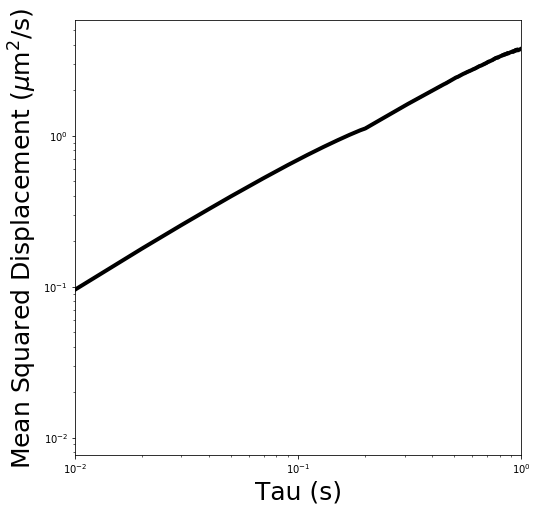

In [18]:
fig = plt.figure(figsize=(8, 8))
y_range = 1
plt.xlim(10**-2, 10**0)
#plt.ylim(0, y_range)

x = np.linspace(0, frames-1, frames)/fps

plt.loglog(x, np.exp(geo), 'k', linewidth=4)
plt.loglog(x, np.exp(geo - 1.96*gS), 'k--', linewidth=2)
plt.loglog(x, np.exp(geo + 1.96*gS), 'k--', linewidth=2)

plt.xlabel('Tau (s)', fontsize=25)
plt.ylabel(r'Mean Squared Displacement ($\mu$m$^2$/s)', fontsize=25)
